In [5]:
from Config import Config, plot_rewards, print_cfgs
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import DoubleDQN
import d2l.torch as d2l
import torch

Hyperparameters:
        Name        	       Value        	        Type        
     algo_name      	     DoubleDQN      	   <class 'str'>    
      env_name      	    CartPole-v1     	   <class 'str'>    
        seed        	         1          	   <class 'int'>    
     train_eps      	        100         	   <class 'int'>    
      test_eps      	         10         	   <class 'int'>    
     max_steps      	        200         	   <class 'int'>    
       gamma        	        0.99        	  <class 'float'>   
         lr         	       0.0001       	  <class 'float'>   
   epsilon_start    	        0.95        	  <class 'float'>   
    epsilon_end     	        0.01        	  <class 'float'>   
   epsilon_decay    	        500         	   <class 'int'>    
    buffer_size     	       10000        	   <class 'int'>    
     batch_size     	         64         	   <class 'int'>    
   target_update    	         4          	   <class 'int'>    
     hidden_dim     	        256      

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


回合：10/100，奖励：24.00，Epislon：0.663
回合：20/100，奖励：10.00，Epislon：0.508
回合：30/100，奖励：10.00，Epislon：0.395
回合：40/100，奖励：10.00，Epislon：0.308
回合：50/100，奖励：46.00，Epislon：0.222
回合：60/100，奖励：87.00，Epislon：0.057
回合：70/100，奖励：37.00，Epislon：0.025
回合：80/100，奖励：62.00，Epislon：0.013
回合：90/100，奖励：200.00，Epislon：0.010
回合：100/100，奖励：200.00，Epislon：0.010
完成训练！
开始测试！
回合：1/10，奖励：200.00
回合：2/10，奖励：200.00
回合：3/10，奖励：190.00
回合：4/10，奖励：200.00


/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/wyq/Workspace/AttentionRL/StateAttentionDDQN/Config.py:40: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, len(rewards), 10)  # 设置x轴的范围


回合：5/10，奖励：200.00
回合：6/10，奖励：200.00
回合：7/10，奖励：200.00
回合：8/10，奖励：200.00
回合：9/10，奖励：200.00
回合：10/10，奖励：200.00
完成测试


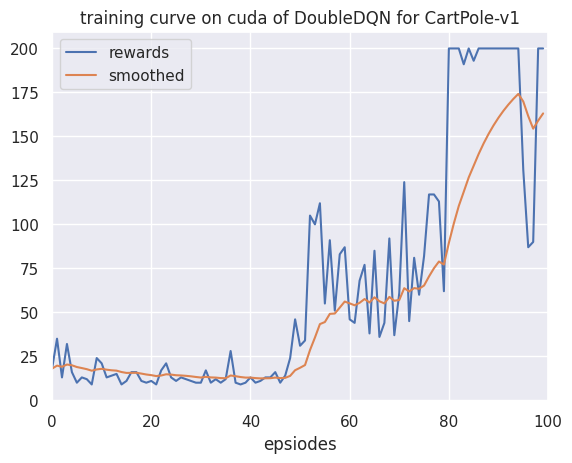

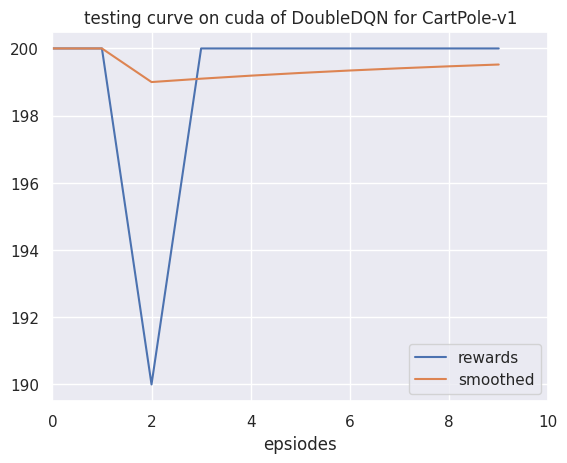

In [6]:
# 获取参数
cfg = Config() 
print_cfgs(cfg)
# 训练
env, agent = env_agent_config(cfg)
res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], title=f"training curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")  
# 测试
res_dic = test(cfg, env, agent)
plot_rewards(res_dic['rewards'], title=f"testing curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")

KeyboardInterrupt: 

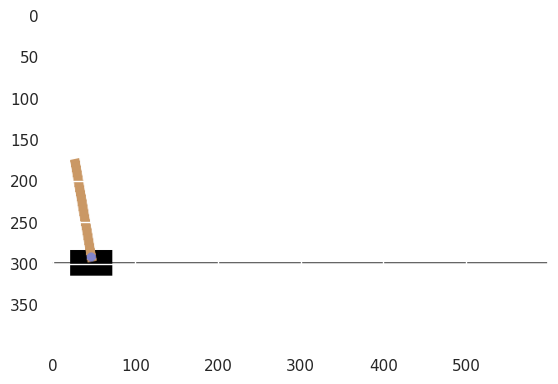

In [9]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = agent
draw_agent.policy_net.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actions = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action = draw_agent.predict_action(state)
        actions.append(action)
        state, reward, done, _ = env.step(action)

        total_reward += reward
        img.set_data(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)

draw_agent.policy_net.train()
print("length of actions is ", len(actions))